# Exam September 19, 2024

In [2]:
import sympy
import math
from IPython.display import display, Math
from robotic.manipulator import JointType, Manipulator
from robotic import scalar_repr_latex
from robotic.utils import draw_frame
from robotic.transformations import (
    Axis,
    AxisAngleSpec,
    EulerOrder,
    EulerSequence,
    EulerSpec,
    HomogeneousTransformation,
    Rotation,
    Translation,
    X,
    Y,
    Z,
)

Axis(0, 1, 0)


# Excercise 1

First thing to note, is that a very similar example is discussed in [lecture 15](https://youtu.be/cNmp21y9HFI?t=4534&si=KSsVpLEfXqIYVcLh).
This seems in fact a standard robot.
While the first three joints are almost visible and understanble from the picture, the last three joints are somewhat hidden assume the image is embedded in the XY plane with x pointing right and y pointing up:

- a rotation along x
- a rotation along z
- a rotation along x

Even if not immidiately clear from the picture we have two offsets, one for going from frame 0 to frame 1 and the other from frame 2 to all the spherical wrist offsets.


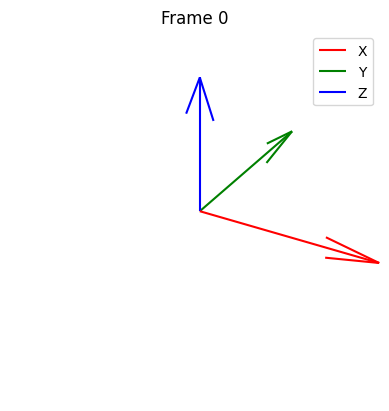

In [29]:
r_0 = Rotation.from_euler(((0,0,0), EulerSequence.XYZ,"MOVING"))
# Idiosincracy of matplotlib, this is actually the way matplotlib plots 3D space
frame_0 = draw_frame(r_0,label = "Frame 0", basis=Rotation.identity())

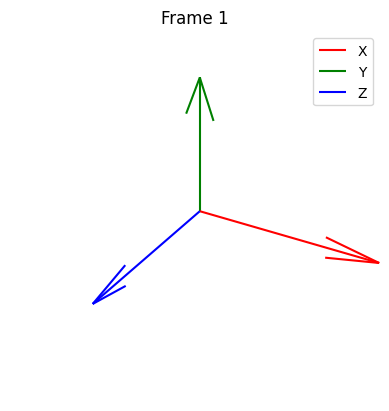

In [30]:
r_1 = Rotation.from_euler(((sympy.pi/2,0,0), EulerSequence.XYZ,"MOVING"))
frame_1 = draw_frame(r_1,label = "Frame 1",basis=frame_0)

The two frames have the same $z$ axis, however the condition for the direction of the $x$ axis is not met.
From the book, page 64:

> Choose the $x_i$ axis along the common normal to axes $z_{i-1}$ and $z_i$, with direction from Joint $i$ to Joint $i+1$

Which can be divided into two separate conditions:

1. Axis $x_i$ must lie along the common normal to axes $z_{i-1}$ and $z_i$
2. Axis $x_i$ must be directed from Joint $i$ to Joint $i+1$

To meet condition 1, we must have a rotation of $\pm \frac{\pi}{2}$, now, the only way to also satisfy condition 2 is to choose the positive rotation, so that $x_i$ points "upwards"

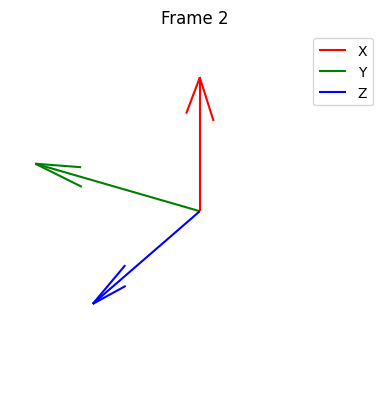

In [31]:
r_2 = Rotation.from_euler(((0,0,sympy.pi/2), EulerSequence.XYZ,"MOVING"))
frame_2 = draw_frame(r_2,label = "Frame 2",basis=frame_1)

In this case the common normal should point to the same direction of $x_2$.
This is because $z_3$ and $z_2$ intersect, and $x$ should pass along this point in a way that is normal to both $z_3$ and $z_2$.
In theory $x$ can either point upwards or downards.
Since $x_2$ already upward, choosing $x_3$ that points upward means no rotation along $z_{i-1}$, so there should be no offset along the DH parameter $\theta$, if other wise we decide to choose $x_3$ pointing downard, we should embed this information by a constant offset of $\pi$.
<div class="alert alert-block alert-warning">
<b>TODO:</b> Ask de Luca if this rationale is sound.
</div>

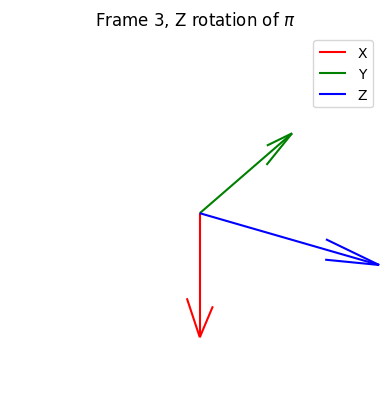

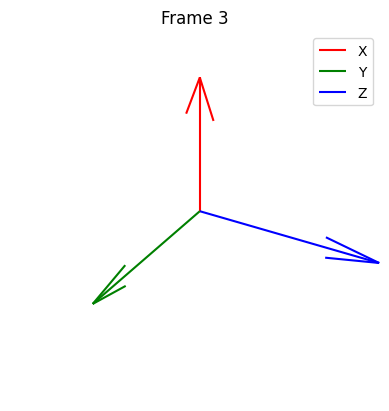

In [38]:
r_3 = Rotation.from_euler(((sympy.pi/2,0,sympy.pi), EulerSequence.XYZ,"MOVING"))
frame_3 = draw_frame(r_3,label = r"Frame 3, Z rotation of $\pi$", basis=frame_2)
r_3 = Rotation.from_euler(((sympy.pi/2,0,0), EulerSequence.XYZ,"MOVING"))
frame_3 = draw_frame(r_3,label = "Frame 3", basis=frame_2)